# Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import cv2

%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow.keras import Model,Input
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
from google.colab.patches import cv2_imshow
import re
import random

 # TASK 1: Loading Data 

Load the data and save it in appropriate variables. Display an image and its corresponding label. 

In [5]:
!unzip -q -o  "/content/gdrive/My Drive/animal_dataset_intermediate.zip"

In [6]:
train_path = "animal_dataset_intermediate/train"
test_path = "animal_dataset_intermediate/test"

In [47]:
image_files = glob(train_path+"/*/*.jp*")
random.seed(33)
random.shuffle(image_files) #shuffle images
test_image_files = glob(test_path+"/*")

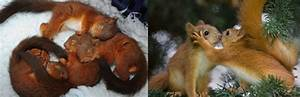

scoiattolo


In [8]:
n = 0   #image number

img = cv2.imread(image_files[n],1) 
cv2_imshow(img)
print((re.search("\w*(\/)",image_files[n].replace("animal_dataset_intermediate/train/","").replace("_train",""))[0]).replace("/",""))

Lets take a look at image size

In [9]:
img.shape

(97, 300, 3)

We need to fix it to an specific value for our networks input. 224 x 224 is selected as it is a popular image size in a lot of networks.

In [10]:
IMAGE_SIZE=(224,224)

Lets convert images to an array

In [11]:
X = np.array([cv2.resize(cv2.imread(x,1),IMAGE_SIZE) for x in image_files])

In [12]:
y = np.array([(re.search("\w*(\/)",n.replace("animal_dataset_intermediate/train/","").replace("_train",""))[0]).replace("/","") for n in image_files])

In [13]:
X.shape

(8162, 224, 224, 3)

In [14]:
y.shape

(8162,)

# TASK 2: Pre-processing

Apply the required pre-processing steps on the image data. These may include scaling, converting to grayscale or anything else. Justify your decision about performing those particular pre-processing steps. 

Lets start rescaling the data

In [13]:
X = X/255

Lets encode the output

In [14]:
y_dummy = pd.get_dummies(y)

In [17]:
y_dummy

,elefante,farfalla,mucca,pecora,scoiattolo
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,1,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
8157,0,0,0,1,0
8158,1,0,0,0,0
8159,0,0,0,0,1
8160,0,1,0,0,0


# TASK 3: Building a Multi-Layer Perceptron

Create a multi-layer perceptron, deciding on the number of layers, neurons and activation functions that should be provided. Print a summary and architecture of the model. Explain the architecture.

In [ ]:
N, D = X.reshape(X.shape[0],-1).shape 
_, K = y_dummy.shape

In [ ]:
tf.keras.backend.clear_session()

In [ ]:
m_in = Input(shape=[D,])
m = Dense(100,activation = "relu")(m_in)
m = Dense(50,activation = "relu")(m)
m = Dense(K,activation = "softmax")(m)

In [ ]:
dense_nn = Model(inputs = m_in, outputs = m)

In [ ]:
dense_nn.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150528)]          0         
_________________________________________________________________
dense (Dense)                (None, 100)               15052900  
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 255       
Total params: 15,058,205
Trainable params: 15,058,205
Non-trainable params: 0
_________________________________________________________________


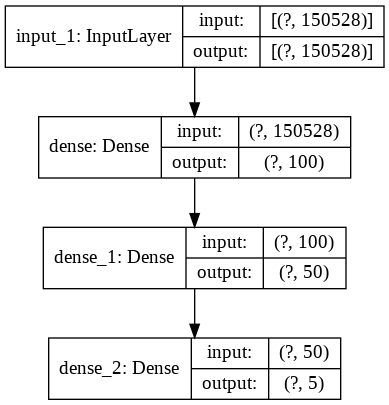

In [ ]:
tf.keras.utils.plot_model(dense_nn,show_shapes=True)

# TASK 4: Optimizer

Decide the Learning Rate, Optimizer, Loss Function and Metrics to be used and justify why they were chosen. 

In [ ]:
from tensorflow.keras.optimizers import Adam, SGD

dense_nn.compile(loss='categorical_crossentropy',optimizer=Adam(1e-6),metrics=['accuracy'])

# TASK 5: Training the model

Fit the model to the data by dividing the train data into train and validation set in a ratio of 80:20. Decide the number of epochs and ensure overfitting doesn’t occur.

In [ ]:
dense_nn.fit(X.reshape(X.shape[0],-1),y_dummy, epochs = 200, batch_size=64,validation_split = 0.2) #fit with 20# validation set

Epoch 1/200
103/103 [==============================] - 2s 23ms/step - loss: 1.5677 - accuracy: 0.2795 - val_loss: 1.5060 - val_accuracy: 0.3595
Epoch 2/200
103/103 [==============================] - 2s 18ms/step - loss: 1.4739 - accuracy: 0.3578 - val_loss: 1.4583 - val_accuracy: 0.3748
Epoch 3/200
103/103 [==============================] - 2s 18ms/step - loss: 1.4339 - accuracy: 0.3893 - val_loss: 1.4408 - val_accuracy: 0.3974
Epoch 4/200
103/103 [==============================] - 2s 18ms/step - loss: 1.4017 - accuracy: 0.4103 - val_loss: 1.4434 - val_accuracy: 0.3509
Epoch 5/200
103/103 [==============================] - 2s 18ms/step - loss: 1.3753 - accuracy: 0.4342 - val_loss: 1.3817 - val_accuracy: 0.4366
Epoch 6/200
103/103 [==============================] - 2s 18ms/step - loss: 1.3490 - accuracy: 0.4403 - val_loss: 1.3714 - val_accuracy: 0.4329
Epoch 7/200
103/103 [==============================] - 2s 18ms/step - loss: 1.3319 - accuracy: 0.4543 - val_loss: 1.3518 - val_accuracy:

In [ ]:
dense_nn.save("nn_model.h5")

# TASK 6: Tensorboard

Use Tensorboard to display the accuracy and loss graphs of the training. 

# TASK 7: Building a Convolutional Neural Network

Build a Convolutional Neural Network (CNN) on the given dataset. Decide the number of convolution, pooling layers. Print a summary and architecture of the model. Explain the architecture. Perform all the steps applied on MLP and compare the performances of both. 

In [ ]:
input = Input(shape=(224,224,3))
m = Conv2D(64,(3,3),padding = "same") (input)
m = Conv2D(64,(3,3),padding = "same", strides = 2) (m)
m = Conv2D(128,(3,3),padding = "same") (m)
m = Conv2D(128,(3,3),padding = "same", strides = 2) (m)
m = Conv2D(256,(3,3),padding = "same") (m)
m = Conv2D(256,(3,3),padding = "same") (m)
m = Conv2D(512,(3,3),padding = "same", strides = 2) (m)
m = Conv2D(512,(3,3),padding = "same") (m)
m = Conv2D(512,(3,3),padding = "same") (m)
m = Conv2D(512,(3,3),padding = "same", strides = 2) (m)
m = Flatten()(m)
m = Dense(K, activation = "softmax")(m)

conv_model = Model(inputs= input, outputs = m)

conv_model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 128)       147584    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 256)      

In [ ]:
conv_model.compile(loss = "categorical_crossentropy",metrics=["accuracy"],optimizer = "adam")

In [ ]:
conv_model.fit(X,y_dummy, epochs = 200, batch_size=64,validation_split = 0.2)

Epoch 1/200
103/103 [==============================] - 25s 239ms/step - loss: 445.4943 - accuracy: 0.2175 - val_loss: 2.2223 - val_accuracy: 0.2076
Epoch 2/200
103/103 [==============================] - 24s 230ms/step - loss: 1.6164 - accuracy: 0.2970 - val_loss: 2.1833 - val_accuracy: 0.2156
Epoch 3/200
103/103 [==============================] - 24s 230ms/step - loss: 1.5903 - accuracy: 0.3301 - val_loss: 2.4280 - val_accuracy: 0.1911
Epoch 4/200
103/103 [==============================] - 24s 231ms/step - loss: 1.5303 - accuracy: 0.3575 - val_loss: 1.6417 - val_accuracy: 0.3092
Epoch 5/200
103/103 [==============================] - 24s 231ms/step - loss: 1.4815 - accuracy: 0.3627 - val_loss: 1.4601 - val_accuracy: 0.3717
Epoch 6/200
103/103 [==============================] - 24s 231ms/step - loss: 1.4510 - accuracy: 0.3821 - val_loss: 1.6914 - val_accuracy: 0.3374
Epoch 7/200
103/103 [==============================] - 24s 231ms/step - loss: 1.4414 - accuracy: 0.3933 - val_loss: 2.7103

# TASK 8: Optimization Techniques

Apply a minimum of two different optimization techniques on both models (CNN and MLP) e.g. including Dropouts in-between, and list down any performance improvements.



# TASK 9: Predict

Use the model that is performing better to predict over new_test_data. Please pay attention to the class labels, since your predictions will be evaluated against the same labels.


In [15]:
ptm = VGG16(
    input_shape= list(IMAGE_SIZE)+[3], #add color channel
    weights = "imagenet", #weights trained on imagenet
    include_top = False) #Dont include flatten nor dense

ptm.trainable = False #Freeze pretrained weights

In [16]:
input = Input(shape=(224,224,3))
x = ptm.layers[1](input) #assuming you are ignoring the first conv layer as implied in your code
for layer in ptm.layers[2:]:
    x = layer(x)

m = Flatten()(x)
m = Dense(len(y_dummy.columns),activation = "softmax")(m)

model = Model(inputs = input, outputs = m)

model.summary()


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [17]:
gen_train = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
)

In [18]:
batch_size = 128

In [19]:
train_generator = gen_train.flow(
  X, y = y_dummy,
  batch_size=batch_size
)

In [20]:
model.compile(
    loss = "categorical_crossentropy",
    optimizer = "adam",
    metrics = ["accuracy"])


In [21]:
tf.keras.backend.clear_session()

In [24]:
r = model.fit_generator(
    train_generator,
    epochs = 20,
    steps_per_epoch = int(np.ceil(len(image_files)/batch_size))
    )

Epoch 1/20
64/64 [==============================] - 82s 1s/step - loss: 0.5072 - accuracy: 0.8103
Epoch 2/20
64/64 [==============================] - 80s 1s/step - loss: 0.3587 - accuracy: 0.8689
Epoch 3/20
64/64 [==============================] - 81s 1s/step - loss: 0.3194 - accuracy: 0.8831
Epoch 4/20
64/64 [==============================] - 82s 1s/step - loss: 0.2733 - accuracy: 0.9014
Epoch 5/20
64/64 [==============================] - 81s 1s/step - loss: 0.2669 - accuracy: 0.9032
Epoch 6/20
64/64 [==============================] - 79s 1s/step - loss: 0.2479 - accuracy: 0.9079
Epoch 7/20
64/64 [==============================] - 77s 1s/step - loss: 0.2427 - accuracy: 0.9112
Epoch 8/20
64/64 [==============================] - 78s 1s/step - loss: 0.2250 - accuracy: 0.9188
Epoch 9/20
64/64 [==============================] - 77s 1s/step - loss: 0.2132 - accuracy: 0.9264
Epoch 10/20
64/64 [==============================] - 77s 1s/step - loss: 0.1918 - accuracy: 0.9320
Epoch 11/20
64/64 [

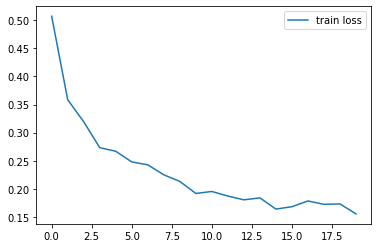

In [25]:
plt.plot(r.history['loss'], label='train loss')
#plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

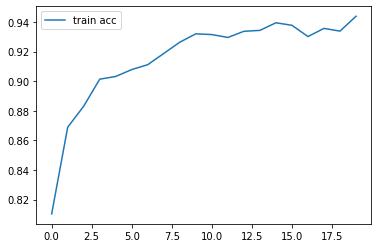

In [26]:
plt.plot(r.history['accuracy'], label='train acc')
#plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [27]:
model.save("model1.h5")

In [49]:
X_t = np.array([cv2.resize(cv2.imread(x,1),IMAGE_SIZE) for x in test_image_files])/255

In [50]:
X_t.shape

(910, 224, 224, 3)

In [51]:
predict = model.predict(X_t).argmax(axis=1)

In [52]:
predict2 = pd.Series(predict).map(lambda x: y_dummy.columns[x] )

In [53]:
files = pd.Series(test_image_files).map(lambda x: x.replace("animal_dataset_intermediate/test/",""))

In [54]:
df2 = pd.DataFrame([files,predict2]).transpose()

In [55]:
df2.columns = ["filename","label"]

In [56]:
df3 = pd.read_csv("animal_dataset_intermediate/Testing_set_animals.csv").merge(df2, on = "filename").drop("target",axis = 1)

In [57]:
df3.to_csv("predictions.csv",index=False)

from google.colab import files
files.download("predictions.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>